Notebook is copyright &copy; of <a href="https://ajaytech.co">Ajay Tech</a>

## FacetGrid

## Table of Contents

- ### FacetGrids
- ### Creating FacetGrids in Seaborn
- ### Plotting on FacetGrids using map() method
- ### Facet with two variables
- ### FacetGrids with color dimension
- ### Passing 'hue' parameter to plotting function
- ### Change the order of facets
- ### Synchronize the binwidth
- ### Plotting on FacetGrids using map_dataframe() method
- ### Column wrapping

### FacetGrids

When analysing huge volumes of data, putting together all of the data in a single graph looks very cumbersome and does not reveal patterns or relationship between variables effectively. To visualize such datasets, we can use small multiple graphs - each one showing a subset(portion) of the data. The small graphs are also called Facet grids or Trellis plots. Each graph shows the relationship of certain variables using one or more conditions. If the conditioning variable is a categorical variable then each subset corresponds to the different levels of the variable. If the conditioning variable is a numeric then the values of the conditioning variable are grouped into bins and each group represents a subset. The same plot type is rendered on all the graphs making it easy to compare across categories.

<img src="./images/FacetGrid_col.png" align="center"/>  

### Creating FacetGrids in Seaborn

In Seaborn library, multiple graphs can be created using the FacetGrid() class. Consider this example, we want to split the data in 'tips' dataset based on the variable 'time'. The variable 'time' has two categories - 'Lunch', 'Dinner'. So we need two facets/small graphs in order to represent the two categories. The facets can be arranged into columns or rows. Let us say, we want to arrange the facets into different columns. The FacetGrid() function has a 'col' argument for specifying the column name. Set the argument 'col' to 'time' in the FacetGrid() function and the graph gets partitioned into multiple subplots depending on the number of levels in the variable 'time'. 

class seaborn.FacetGrid(data, *, row=None, col=None, hue=None, col_wrap=None, sharex=True, sharey=True, height=3, aspect=1, palette=None, row_order=None, col_order=None, hue_order=None, hue_kws=None, dropna=False, legend_out=True, despine=True, margin_titles=False, xlim=None, ylim=None, subplot_kws=None, gridspec_kws=None, size=None)

In [119]:
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
tips = sns.load_dataset('tips')

In [111]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


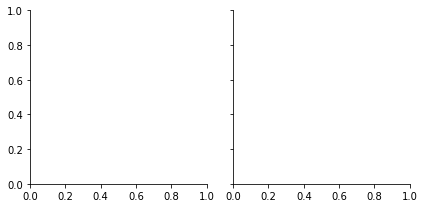

In [64]:
sns.FacetGrid(data=tips,col='time')
plt.show()

The two facets created above using the FacetGrid() class correspond to the two levels in the variable 'time' - 'Lunch', 'Dinner'. First we need to extract data from 'tips' dataset using the variable 'time', this is achieved by setting the argument 'col' to 'time'. The graph gets partitioned based on the number of levels of this variable resulting in 2 individual facets/subplots. The next step is to map each facet with a plotting function with the different subsets of data. 

### Plotting on FacetGrids using map() method

We can specify the plotting function to be applied to each subset by calling the map() method on the FacetGrid object. The map method also accepts positional arguments (args) and keyword arguments (kwargs) such as `color` and `label`. The positional arguments and keyword arguments are passed onto the plotting function.

FacetGrid.map(self, func, *args, **kwargs)

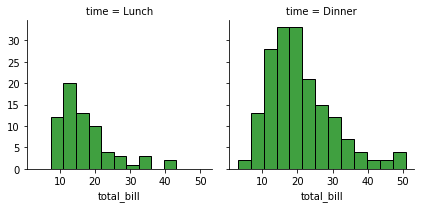

In [65]:
g1 = sns.FacetGrid(data=tips,col='time')
g1.map(sns.histplot,'total_bill',color='g')
plt.show()

Two facets have been created using the FacetGrid() function. The plotting function 'sns.histplot', column 'total_bill' and color 'g' are passed as arguments to the map() method. In order to plot histogram using data in 'total_bill', data that is specific to each facet has to be extracted. The first subset is extracted by applying the condition 'time' == 'Lunch', all values in the column 'total_bill' that meet this condition are selected and this data is used to plot a histogram in the first facet. Similarly, the second subset is extracted by applying the condition 'time' == 'Dinner', all values in the column 'total_bill' that meet this condition are selected and this data is used to plot a histogram in the second facet. The logic for extracting data and passing the relevant data to the plotting function is available in the map() method.

### Facet with two variables

In the previous example, we have extracted data from 'total_bill' using a single column. It is also possible to subset a dataset on both rows and columns. The FacetGrid() function has a 'row' argument for specifying the row name and a 'col' argument for specifying the column name. The graph gets partitioned into multiple facets depending on the levels of the two categorical variables.

<img src="./images/FacetGrid_row_col.png" align="center"/>  

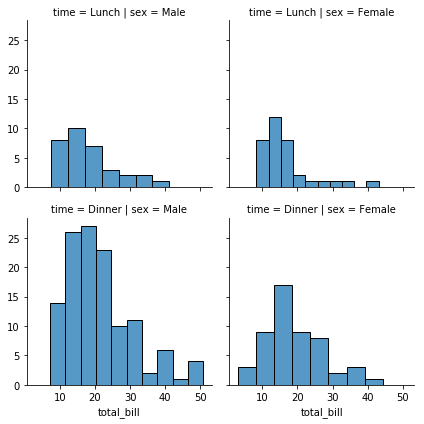

In [66]:
g2 = sns.FacetGrid(data=tips,row='time',col='sex')
g2.map(sns.histplot,'total_bill')
plt.show()

In this example, the argument 'row' is set to 'time' and the argument 'col' is set to 'sex' in the FacetGrid() function and the graph gets partitioned into multiple subplots based on the levels of the two categorical variables 'time' and 'sex'. This results in 4 individual facets/subplots, one subplot for each combination of the two categorical variables. In order to plot on these facets you can call the map() method on the FacetGrid object 'g2' and pass the required arguments.

A histogram is plotted in each of the facets with different subsets of data extracted from column 'total_bill'.

### FacetGrids with color dimension

A FacetGrid can be drawn with upto three dimensions: row , col , and hue. So each facet is conditioned on three variables. The third dimension is indicated by plotting the points with different colors, where different colors indicate different categories of the 'hue' variable.

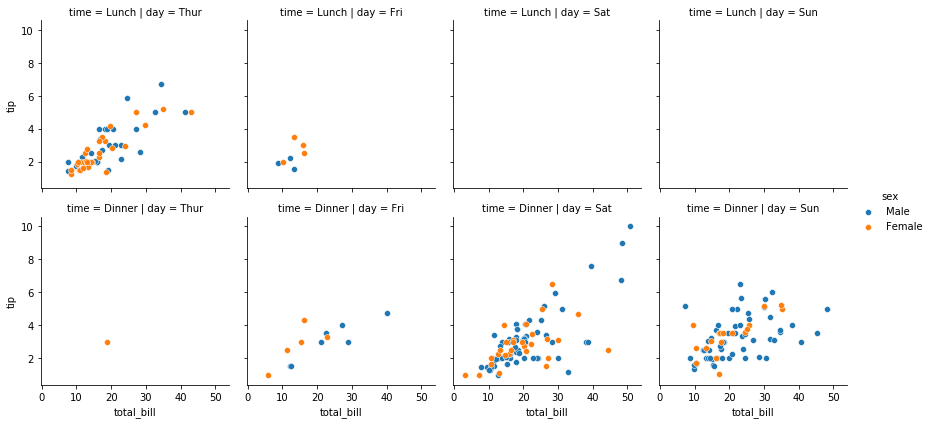

In [146]:
g3 = sns.FacetGrid(data=tips,row='time',col='day',hue='sex')
g3.map(sns.scatterplot,'total_bill','tip')
g3.add_legend()
plt.show()

### Passing 'hue' parameter to the plotting function

Instead of specifying the 'hue' when creating the FacetGrid object, if the plotting function accepts, the 'hue' parameter can be passed to it. 

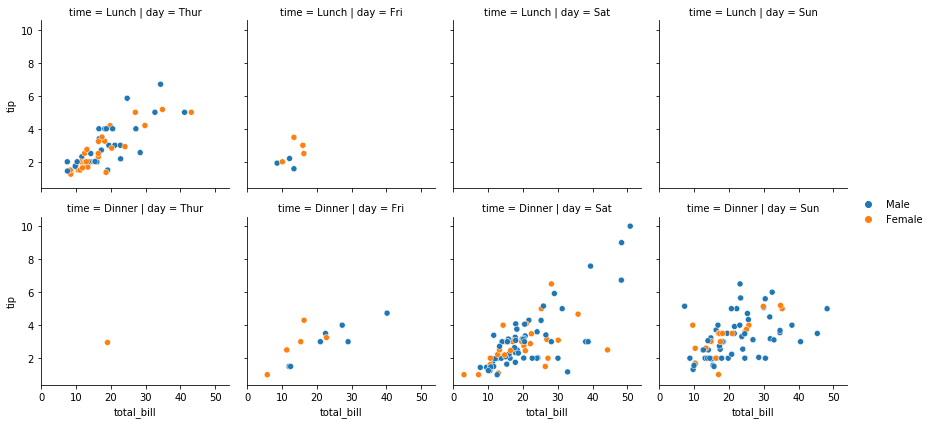

In [147]:
g3 = sns.FacetGrid(data=tips,row='time',col='day')
g3.map(sns.scatterplot,'total_bill','tip',hue=tips['sex'])
g3.add_legend()
plt.show()

### Change the order of facets

In the example below, the facets are arranged in two different rows. The order in which the facets are arranged in the graph is based on the order of levels listed in the variable 'smoker'. You can specify a different order by passing a list consisting of levels in the categorical variable to the argument 'row_order'.

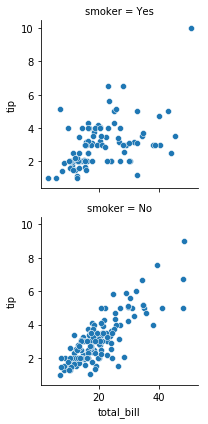

In [124]:
g4 = sns.FacetGrid(tips,row='smoker')
g4.map(sns.scatterplot,'total_bill','tip')
plt.show()

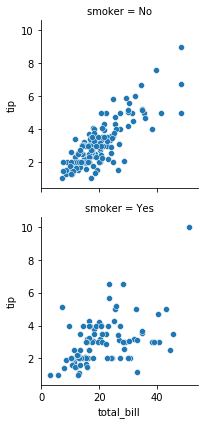

In [125]:
## change the order of facets
g5 = sns.FacetGrid(tips,row='smoker',row_order=['No','Yes'])
g5.map(sns.scatterplot,'total_bill','tip')
plt.show()

### Synchronize the binwidth

Notice that the binwidth of the bars in each facet below is different. If you want to synchronize the binwidth of the bars across all facets, specify a value to the keyword argument 'binwidth'. 

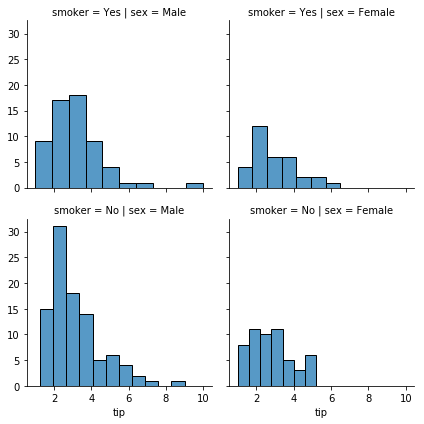

In [126]:
g6 = sns.FacetGrid(tips,row='smoker',col='sex')
g6.map(sns.histplot,'tip')
plt.show()

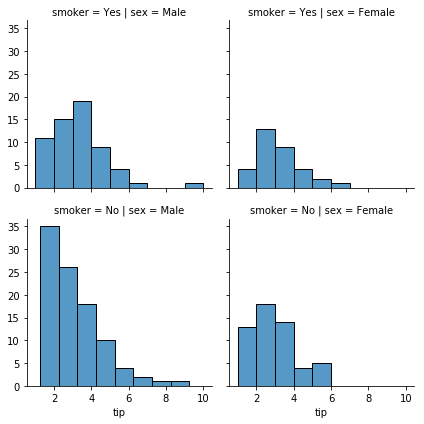

In [50]:
## synchronize the binwidth of the bars across all facets
g7 = sns.FacetGrid(tips,row='smoker',col='sex')
g7.map(sns.histplot,'tip',binwidth=1)
plt.show()

### Plotting on FacetGrids using map_dataframe() method

The map_dataframe() method can also be used to apply plotting function on the facets. 

def map_dataframe(self, func, *args, **kwargs)

Below are the differences between the map() and map_dataframe() methods: 

The map() method accepts array-like objects as positional arguments and 'color','label' as keyword arguments. The values in the arrays/columns corresponding to each facet are passed to the plotting function. The arguments 'color', 'label' are passed as keyword arguments to the plotting function.

The map_dataframe() method  is suitable for plotting with functions that accept a long-form DataFrame as a data keyword argument. This method accepts column names defined in your dataframe and 'color','label' as keyword arguments. The column names are passed as strings to the plotting function. The keyword arguments 'color','label' are passed as keyword arguments to the plotting function. In addition to this, a subset of the dataframe extracted for each facet is passed to the keyword argument 'data'. One more difference between map() and map_dataframe() is that map_dataframe() does not add axis labels. The method set_axis_labels() can be used to add the labels.

In order to understand the difference between the two methods let us define a custom function. The function accepts the positional and keyword arguments from the map() and map_dataframe() methods and prints the same.

In [133]:
import pandas as pd
df = pd.DataFrame({'Name': ['Sara','William','Betty','Tom','Eric','Lisa'], 'Age':[9,6,37,35,65,62],
                   'Gender':['f','m','f','m','m','f']})
df

,Name,Age,Gender
0,Sara,9,f
1,William,6,m
2,Betty,37,f
3,Tom,35,m
4,Eric,65,m
5,Lisa,62,f


In [129]:
## define a custom function
def sample(*args,**kwargs):
    print ('args ',args)
    print ('kwargs ',kwargs)
    print ('-----------------------------------------------------------')    

args  (0     Sara
2    Betty
5     Lisa
Name: Name, dtype: object, 0     9
2    37
5    62
Name: Age, dtype: int64)
kwargs  {'color': 'g'}
-----------------------------------------------------------
args  (1    William
3        Tom
4       Eric
Name: Name, dtype: object, 1     6
3    35
4    65
Name: Age, dtype: int64)
kwargs  {'color': 'g'}
-----------------------------------------------------------


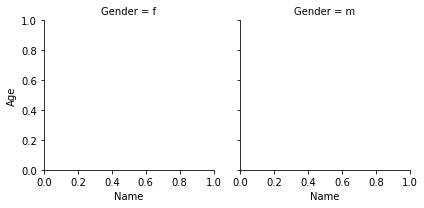

In [143]:
## pass the custom function and columns in dataframe df to the map() method
g8 = sns.FacetGrid(data=df,col='Gender')
g8.map(sample,'Name','Age',color='g')
plt.show()

The sample() method accepts the arguments from map() method as input and prints the same. You can see in the output that the values of the columns 'Name', 'Age' and the keyword argument 'color' corresponding to each facet are passed to the sample() method.

args  ('Name', 'Age')
kwargs  {'color': 'o', 'data':     Name  Age Gender
0   Sara    9      f
2  Betty   37      f
5   Lisa   62      f}
-----------------------------------------------------------
args  ('Name', 'Age')
kwargs  {'color': 'o', 'data':       Name  Age Gender
1  William    6      m
3      Tom   35      m
4     Eric   65      m}
-----------------------------------------------------------


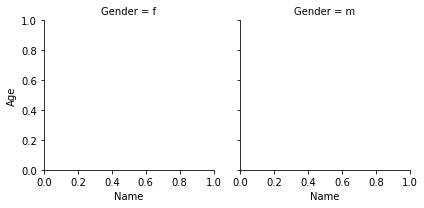

In [144]:
## pass the custom function and columns in dataframe df to the map_dataframe() method
g9 = sns.FacetGrid(data=df,col='Gender')
g9.map_dataframe(sample,'Name','Age',color='o')
g9.set_axis_labels('Name','Age')
plt.show()

You can see in the output that the column names 'Name', 'Age' and the keyword argument 'color' corresponding to each facet are passed to the sample() method. In addition to this, plotting data corresponding to each facet is passed to the kw argument 'data'.

In the below example, map_dataframe() method is called on the FacetGrid object 'g10'. The plotting function 'sns.histplot', columns - 'Name', 'Age' are passed as arguments to the method. As you can see a bivariate histogram is plotted on the facets.

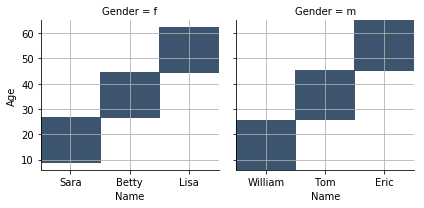

In [142]:
g10 = sns.FacetGrid(data=df,col='Gender',sharex=False)
g10.map_dataframe(sns.histplot,'Name','Age')
g10.set_axis_labels('Name','Age')
plt.show()

### Column wrapping

In the below example, the graph is partitioned by passing the variable 'size' to the argument 'col' in the FacetGrid() function. There are 6 facets arranged in a single row. If a categorical variable has too many levels to plot, then the faceted plots fill up a lot of space. If required, the columns can be wrapped onto a new row.

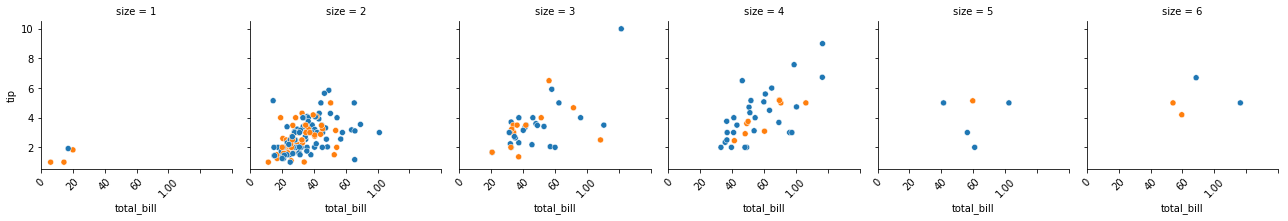

In [76]:
g11 = sns.FacetGrid(tips,col='size')
g11.map_dataframe(sns.scatterplot,'total_bill','tip',hue='sex')
g11.set_xticklabels(rotation=45)
plt.show()

In the example below, the argument 'col_wrap' is assigned the value 2, which means the facets will be wrapped at 2 columns. The graph gets partitioned into 3 rows of 2 columns.

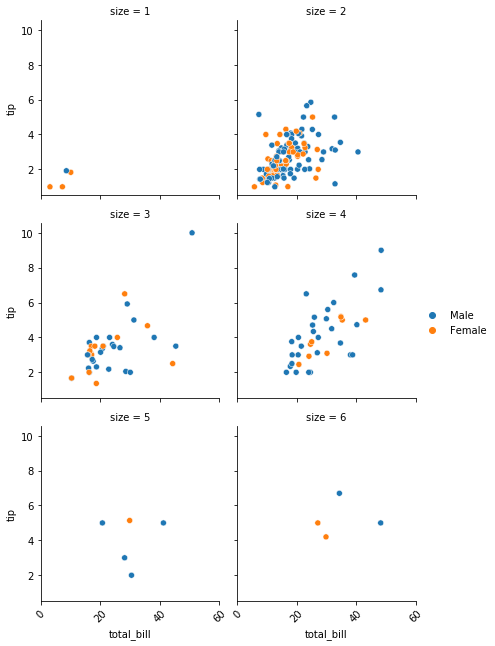

In [145]:
## column wrap
g12 = sns.FacetGrid(tips,col='size',col_wrap=2)
g12.map(sns.scatterplot,'total_bill','tip',hue=tips['sex'])
g12.set_xticklabels(rotation=45)
g12.add_legend()
plt.show()